In [1]:
Tasmia = "In the name of Allah, the Most Benoficient, the Most Merciful"
print(Tasmia)

In the name of Allah, the Most Benoficient, the Most Merciful


### Import Libraries

In [118]:
import re
import nltk
import spacy
from nltk.corpus import stopwords
from textatistic import Textatistic
from nltk.tokenize import regexp_tokenize

from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [3]:
rt = pd.read_csv("russian_tweets.csv")
del rt["Unnamed: 0"]
rt[:5]

,content
0,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...
1,Muslim Attacks NYPD Cops with Meat Cleaver. Me...
2,.@vfpatlas well that's a swella word there (di...
3,RT wehking_pamela: Bobby_Axelrod2k MMFlint don...
4,Жители обстреливаемых районов Донецка проводят...


### Count Characters

In [4]:
def char(c):
    return len(c)

rt["characters"] = rt["content"].apply(char)
rt.sample(5)

,content,characters
987,Warum sollten wir uns noch dazu welche Gedanke...,99
693,"I guardiani di Frontex: ""Scafisti ora lasciano...",113
705,ФОТОРЕПОРТАЖ. Десятки погибших в ДТП с автобус...,109
966,Happy #InternationalCoffeeDay! I vow to never ...,156
409,RT peterboykin: Our Potus realDonaldTrump Quic...,139


**Average Length of Tweet**

In [5]:
print("Average Length of Tweets is", rt["characters"].mean(), "words")

Average Length of Tweets is 103.462 words


**Hashtags and mentions in Russian tweets**

In [6]:
# Hashtags
def hashtag(a):
    pattern = r"#\w+"
    findh = re.findall(pattern, a)
    return len(findh)

rt["Hashtags"] = rt["content"].apply(hashtag)
rt.sample(5)

,content,characters,Hashtags
638,Soooooo I'll start tomorrow on this diet @vibi...,137,0
816,Turner: Colorful NBA Sideline Reporter Craig S...,108,0
982,Аборты попали под расстрел https://t.co/1sogT...,75,0
992,'@JaredWyand It was Hillary who gave birth to ...,82,0
657,'@BleepThePolice @ReverantRevan But a #whistle...,130,1


In [7]:
# Mentions
def mentions(b):
    pattern = r"@\w+"
    findm = re.findall(pattern, b)
    return len(findm)

rt["Mentions"] = rt["content"].apply(mentions)
rt.sample(5)

,content,characters,Hashtags,Mentions
224,RT realDonaldTrump: We ALL must be united &amp...,144,0,0
905,#aleex Watch Rocker Ted Nugent PASSIONATELY De...,128,2,0
11,Drogen an Schulen: Brandenburg verzeichnet Ans...,98,0,0
192,Де Ниро всех переиграл http://t.co/H0qj1tudAs...,69,0,0
75,Ted Nugent’s “Muslim Book Store” Story is Goin...,109,1,0


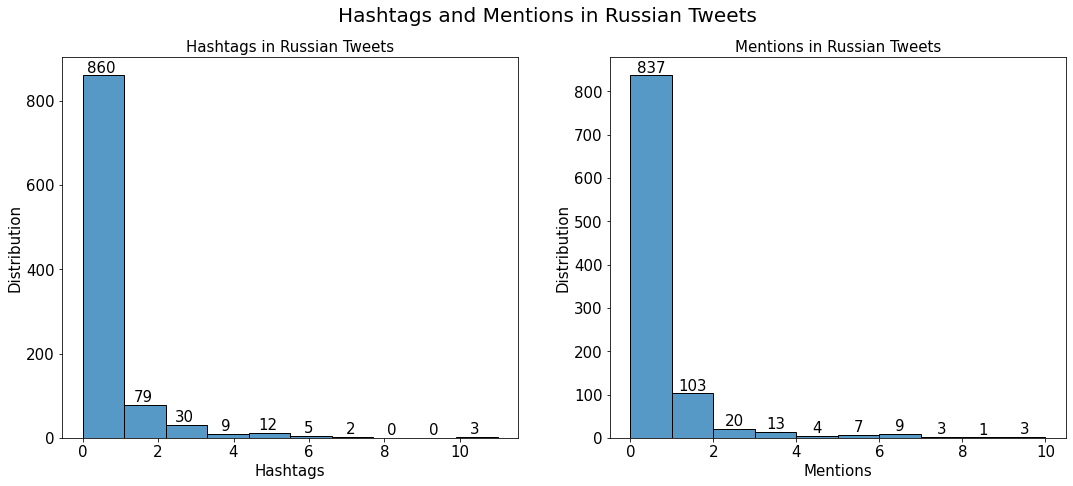

In [8]:
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15


fig, axes = plt.subplots(1, 2, figsize = (18, 7))
fig.suptitle("Hashtags and Mentions in Russian Tweets", fontsize = 20)

# Hours Graph
graph = sns.histplot(ax = axes[0], x = "Hashtags", data = rt, bins = 10)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.5, p.get_height()),
                       ha='center', va='bottom',color= 'black', fontsize = 15)   
    
    
axes[0].set_title("Hashtags in Russian Tweets", size = 15)
axes[0].set_xlabel("Hashtags", size = 15)
axes[0].set_ylabel("Distribution", size = 15)

# Score Graph
graph = sns.histplot(ax = axes[1], x = "Mentions", data = rt, bins = 10)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.5, p.get_height()),
                       ha='center', va='bottom',color= 'black', fontsize = 15)


axes[1].set_title("Mentions in Russian Tweets", size = 15)
axes[1].set_xlabel("Mentions", size = 15)
axes[1].set_ylabel("Distribution", size = 15)
plt.show()

In [9]:
text = rt["content"][128]

pattern = r"@\w+"

re.findall(pattern, text)

['@MmargaretSpence',
 '@JazzyJazz4',
 '@RichGirLaKeitha',
 '@JaneMNsure',
 '@nasoskook']

In [10]:
regexp_tokenize(text, pattern)

['@MmargaretSpence',
 '@JazzyJazz4',
 '@RichGirLaKeitha',
 '@JaneMNsure',
 '@nasoskook']

### TED Talks

In [11]:
ted = pd.read_csv("ted.csv")
ted[:5]

,transcript,url
0,"We're going to talk — my — a new lecture, just...",https://www.ted.com/talks/al_seckel_says_our_b...
1,"This is a representation of your brain, and yo...",https://www.ted.com/talks/aaron_o_connell_maki...
2,It's a great honor today to share with you The...,https://www.ted.com/talks/carter_emmart_demos_...
3,"My passions are music, technology and making t...",https://www.ted.com/talks/jared_ficklin_new_wa...
4,It used to be that if you wanted to get a comp...,https://www.ted.com/talks/jeremy_howard_the_wo...


**Word count of TED talks**

In [12]:
def word_count(y):
    words = y.split()
    return len(words)

ted["Words"] = ted["transcript"].apply(word_count)
ted.sample(5)

,transcript,url,Words
82,Lauren Hodge: If you were going to a restauran...,https://www.ted.com/talks/award_winning_teen_a...,2691
273,I've spent the last decade subjecting myself t...,https://www.ted.com/talks/aj_jacobs_how_health...,1219
388,I'm going to talk to you today about my work o...,https://www.ted.com/talks/mark_roth_suspended_...,2846
339,What do you think when you look at me? A woman...,https://www.ted.com/talks/dalia_mogahed_what_d...,2046
391,Imagine a place where your neighbors greet you...,https://www.ted.com/talks/rich_benjamin_my_roa...,1449


**Average Words in TED**

In [13]:
print("Average Words in a TED show =", ted["Words"].mean())

Average Words in a TED show = 1987.1


### Flesch reading ease score

In [14]:
essay = 'The gods had condemned Sisyphus to ceaselessly rolling a rock to the top of a mountain, whence the stone would fall back of its own weight. They had thought with some reason that there is no more dreadful punishment than futile and hopeless labor. If one believes Homer, Sisyphus was the wisest and most prudent of mortals. According to another tradition, however, he was disposed to practice the profession of highwayman. I see no contradiction in this. Opinions differ as to the reasons why he became the futile laborer of the underworld. To begin with, he is accused of a certain levity in regard to the gods. He stole their secrets. Egina, the daughter of Esopus, was carried off by Jupiter. The father was shocked by that disappearance and complained to Sisyphus. He, who knew of the abduction, offered to tell about it on condition that Esopus would give water to the citadel of Corinth. To the celestial thunderbolts he preferred the benediction of water. He was punished for this in the underworld. Homer tells us also that Sisyphus had put Death in chains. Pluto could not endure the sight of his deserted, silent empire. He dispatched the god of war, who liberated Death from the hands of her conqueror. It is said that Sisyphus, being near to death, rashly wanted to test his wife\'s love. He ordered her to cast his unburied body into the middle of the public square. Sisyphus woke up in the underworld. And there, annoyed by an obedience so contrary to human love, he obtained from Pluto permission to return to earth in order to chastise his wife. But when he had seen again the face of this world, enjoyed water and sun, warm stones and the sea, he no longer wanted to go back to the infernal darkness. Recalls, signs of anger, warnings were of no avail. Many years more he lived facing the curve of the gulf, the sparkling sea, and the smiles of earth. A decree of the gods was necessary. Mercury came and seized the impudent man by the collar and, snatching him from his joys, lead him forcibly back to the underworld, where his rock was ready for him. You have already grasped that Sisyphus is the absurd hero. He is, as much through his passions as through his torture. His scorn of the gods, his hatred of death, and his passion for life won him that unspeakable penalty in which the whole being is exerted toward accomplishing nothing. This is the price that must be paid for the passions of this earth. Nothing is told us about Sisyphus in the underworld. Myths are made for the imagination to breathe life into them. As for this myth, one sees merely the whole effort of a body straining to raise the huge stone, to roll it, and push it up a slope a hundred times over; one sees the face screwed up, the cheek tight against the stone, the shoulder bracing the clay-covered mass, the foot wedging it, the fresh start with arms outstretched, the wholly human security of two earth-clotted hands. At the very end of his long effort measured by skyless space and time without depth, the purpose is achieved. Then Sisyphus watches the stone rush down in a few moments toward tlower world whence he will have to push it up again toward the summit. He goes back down to the plain. It is during that return, that pause, that Sisyphus interests me. A face that toils so close to stones is already stone itself! I see that man going back down with a heavy yet measured step toward the torment of which he will never know the end. That hour like a breathing-space which returns as surely as his suffering, that is the hour of consciousness. At each of those moments when he leaves the heights and gradually sinks toward the lairs of the gods, he is superior to his fate. He is stronger than his rock. If this myth is tragic, that is because its hero is conscious. Where would his torture be, indeed, if at every step the hope of succeeding upheld him? The workman of today works everyday in his life at the same tasks, and his fate is no less absurd. But it is tragic only at the rare moments when it becomes conscious. Sisyphus, proletarian of the gods, powerless and rebellious, knows the whole extent of his wretched condition: it is what he thinks of during his descent. The lucidity that was to constitute his torture at the same time crowns his victory. There is no fate that can not be surmounted by scorn. If the descent is thus sometimes performed in sorrow, it can also take place in joy. This word is not too much. Again I fancy Sisyphus returning toward his rock, and the sorrow was in the beginning. When the images of earth cling too tightly to memory, when the call of happiness becomes too insistent, it happens that melancholy arises in man\'s heart: this is the rock\'s victory, this is the rock itself. The boundless grief is too heavy to bear. These are our nights of Gethsemane. But crushing truths perish from being acknowledged. Thus, Edipus at the outset obeys fate without knowing it. But from the moment he knows, his tragedy begins. Yet at the same moment, blind and desperate, he realizes that the only bond linking him to the world is the cool hand of a girl. Then a tremendous remark rings out: "Despite so many ordeals, my advanced age and the nobility of my soul make me conclude that all is well." Sophocles\' Edipus, like Dostoevsky\'s Kirilov, thus gives the recipe for the absurd victory. Ancient wisdom confirms modern heroism. One does not discover the absurd without being tempted to write a manual of happiness. "What!---by such narrow ways--?" There is but one world, however. Happiness and the absurd are two sons of the same earth. They are inseparable. It would be a mistake to say that happiness necessarily springs from the absurd. Discovery. It happens as well that the felling of the absurd springs from happiness. "I conclude that all is well," says Edipus, and that remark is sacred. It echoes in the wild and limited universe of man. It teaches that all is not, has not been, exhausted. It drives out of this world a god who had come into it with dissatisfaction and a preference for futile suffering. It makes of fate a human matter, which must be settled among men. All Sisyphus\' silent joy is contained therein. His fate belongs to him. His rock is a thing. Likewise, the absurd man, when he contemplates his torment, silences all the idols. In the universe suddenly restored to its silence, the myriad wondering little voices of the earth rise up. Unconscious, secret calls, invitations from all the faces, they are the necessary reverse and price of victory. There is no sun without shadow, and it is essential to know the night. The absurd man says yes and his efforts will henceforth be unceasing. If there is a personal fate, there is no higher destiny, or at least there is, but one which he concludes is inevitable and despicable. For the rest, he knows himself to be the master of his days. At that subtle moment when man glances backward over his life, Sisyphus returning toward his rock, in that slight pivoting he contemplates that series of unrelated actions which become his fate, created by him, combined under his memory\'s eye and soon sealed by his death. Thus, convinced of the wholly human origin of all that is human, a blind man eager to see who knows that the night has no end, he is still on the go. The rock is still rolling. I leave Sisyphus at the foot of the mountain! One always finds one\'s burden again. But Sisyphus teaches the higher fidelity that negates the gods and raises rocks. He too concludes that all is well. This universe henceforth without a master seems to him neither sterile nor futile. Each atom of that stone, each mineral flake of that night filled mountain, in itself forms a world. The struggle itself toward the heights is enough to fill a man\'s heart. One must imagine Sisyphus happy.'

In [15]:
# Compute the readability scores 
readability_scores = Textatistic(essay).scores

# Print the flesch reading ease score
flesch_score = readability_scores["flesch_score"]
print("Flesch Reading Score is =", round(flesch_score))

Flesch Reading Score is = 82


**Flesch reading ease score on Russian Tweets**

In [16]:
def flesch(r):
    try:
        rs = Textatistic(r).scores
        fs = rs["flesch_score"]
        return fs
    
    except ZeroDivisionError:
        return 0
  
        
rt["Flesch_Score"] = rt["content"].apply(flesch)
rt.sample(5)

,content,characters,Hashtags,Mentions,Flesch_Score
6,'@ShaunKing justice in America...',34,0,1,78.581667
37,"Cyclists, fitness enthusiasts and film fans ar...",121,0,0,47.832500
933,I don't get offended when Arabs use terror aga...,158,3,0,66.787143
913,Belle victoire d'Alexander @VanderBellen en Au...,104,0,1,78.872857
571,#Jeffflake owned by @USChamber &amp; #Kstreet ...,163,10,1,50.610000


**Flesch reading ease score on TED Talks**

In [17]:
def flesch(r):
    try:
        rs = Textatistic(r).scores
        fs = rs["flesch_score"]
        return fs
    
    except ZeroDivisionError:
        return 0

ted["Flesch_Score"] = ted["transcript"].apply(flesch)
ted[:5]

,transcript,url,Words,Flesch_Score
0,"We're going to talk — my — a new lecture, just...",https://www.ted.com/talks/al_seckel_says_our_b...,1704,85.321801
1,"This is a representation of your brain, and yo...",https://www.ted.com/talks/aaron_o_connell_maki...,1387,82.711233
2,It's a great honor today to share with you The...,https://www.ted.com/talks/carter_emmart_demos_...,890,78.084014
3,"My passions are music, technology and making t...",https://www.ted.com/talks/jared_ficklin_new_wa...,1548,78.816247
4,It used to be that if you wanted to get a comp...,https://www.ted.com/talks/jeremy_howard_the_wo...,3480,70.828069


### Tokenization

In [19]:
nlp = spacy.load("en_core_web_lg")

In [20]:
string = "I am going to Karachi. I love to visit Manora"

# Doc Object
doc = nlp(string)

# Create tokens
tokens = [token.text for token in doc]
print(tokens)

['I', 'am', 'going', 'to', 'Karachi', '.', 'I', 'love', 'to', 'visit', 'Manora']


### Lemmatization

In [23]:
tokens = [token.lemma_ for token in doc]
tokens

['I', 'be', 'go', 'to', 'Karachi', '.', 'I', 'love', 'to', 'visit', 'Manora']

In [24]:
gettysburg = "Four score and seven years ago our fathers brought forth on this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we're engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We're met on a great battlefield of that war. We've come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It's altogether fitting and proper that we should do this. But, in a larger sense, we can't dedicate - we can not consecrate - we can not hallow - this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced. It's rather for us to be here dedicated to the great task remaining before us - that from these honored dead we take increased devotion to that cause for which they gave the last full measure of devotion - that we here highly resolve that these dead shall not have died in vain - that this nation, under God, shall have a new birth of freedom - and that government of the people, by the people, for the people, shall not perish from the earth."

In [26]:
doc = nlp(gettysburg)

tokens = [token.lemma_ for token in doc]
token_string = " ".join(tokens)
token_string

"four score and seven year ago our father bring forth on this continent , a new nation , conceive in Liberty , and dedicate to the proposition that all man be create equal . now we be engage in a great civil war , test whether that nation , or any nation so conceive and so dedicated , can long endure . we be meet on a great battlefield of that war . we 've come to dedicate a portion of that field , as a final resting place for those who here give their life that that nation might live . it be altogether fitting and proper that we should do this . but , in a large sense , we ca n't dedicate - we can not consecrate - we can not hallow - this ground . the brave man , living and dead , who struggle here , have consecrate it , far above our poor power to add or detract . the world will little note , nor long remember what we say here , but it can never forget what they do here . it be for we the living , rather , to be dedicate here to the unfinished work which they who fight here have thus

**Blog**

In [27]:
blog = "Twenty-first-century politics has witnessed an alarming rise of populism in the U.S. and Europe. The first warning signs came with the UK Brexit Referendum vote in 2016 swinging in the way of Leave. This was followed by a stupendous victory by billionaire Donald Trump to become the 45th President of the United States in November 2016. Since then, Europe has seen a steady rise in populist and far-right parties that have capitalized on Europe’s Immigration Crisis to raise nationalist and anti-Europe sentiments. Some instances include Alternative for Germany (AfD) winning 12.6% of all seats and entering the Bundestag, thus upsetting Germany’s political order for the first time since the Second World War, the success of the Five Star Movement in Italy and the surge in popularity of neo-nazism and neo-fascism in countries such as Hungary, Czech Republic, Poland and Austria."

In [52]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [54]:
doc = nlp(blog)

# Generate lemmatized tokens
lemmas = [token.lemma_ for token in doc]

# Remove stopwords and non-alphabetic tokens
a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]

# Print string after text cleaning
print(' '.join(a_lemmas))

century politic witness alarming rise populism Europe warning sign come UK Brexit Referendum vote swinge way Leave follow stupendous victory billionaire Donald Trump President United States November Europe steady rise populist far right party capitalize Europe Immigration Crisis raise nationalist anti europe sentiment instance include Alternative Germany AfD win seat enter Bundestag upset Germany political order time Second World War success Five Star Movement Italy surge popularity neo nazism neo fascism country Hungary Czech Republic Poland Austria


### Cleaning TED talks in a dataframe

In [58]:
ted10 = ted.iloc[:10, :]

In [59]:
def preprocess(text):
    doc = nlp(text)
    
    lemmas = [token.lemma_ for token in doc]
    
    lemmas_a = [lemma for lemma in lemmas if lemma.isalpha() and lemma not in stopwords]
    
    return " ".join(lemmas_a)

ted10["machine_friendly"] = ted10["transcript"].apply(preprocess)
ted10[:5]

C:\Users\cvalley\anaconda3\envs\Deep\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,transcript,url,Words,Flesch_Score,machine_friendly
0,"We're going to talk — my — a new lecture, just...",https://www.ted.com/talks/al_seckel_says_our_b...,1704,85.321801,talk new lecture TED I illusion create TED I t...
1,"This is a representation of your brain, and yo...",https://www.ted.com/talks/aaron_o_connell_maki...,1387,82.711233,representation brain brain break left half log...
2,It's a great honor today to share with you The...,https://www.ted.com/talks/carter_emmart_demos_...,890,78.084014,great honor today share Digital Universe creat...
3,"My passions are music, technology and making t...",https://www.ted.com/talks/jared_ficklin_new_wa...,1548,78.816247,passion music technology thing combination thi...
4,It used to be that if you wanted to get a comp...,https://www.ted.com/talks/jeremy_howard_the_wo...,3480,70.828069,use want computer new program programming requ...


### POS Tagging

In [63]:
string = "Zeeshan Hassan is a famous Pakistani Data Scientist"

doc = nlp(string)

pos = [(token.text, token.pos_) for token in doc]

pos

[('Zeeshan', 'PROPN'),
 ('Hassan', 'PROPN'),
 ('is', 'AUX'),
 ('a', 'DET'),
 ('famous', 'ADJ'),
 ('Pakistani', 'PROPN'),
 ('Data', 'PROPN'),
 ('Scientist', 'PROPN')]

### Named Entity Recognition

In [65]:
ents = [(token.text, token.label_) for token in doc.ents]
print(ents)

[('Zeeshan Hassan', 'PERSON'), ('Pakistani Data', 'ORG')]


### Person

In [69]:
text = "It’s' been a busy day for Facebook  exec. Earlier this morning, Sheryl Sandberg broke the site’s silence around the Christchurch massacre, and now Mark Zuckerberg is calling on governments and other bodies to increase regulation around the sorts of data Facebook traffics in. He’s hoping to get out in front of heavy-handed regulation and get a seat at the table shaping it."

In [71]:
docs = nlp(text)

person = [doc.text for doc in docs.ents if doc.label_ == "PERSON"]
person

['Sheryl Sandberg', 'Mark Zuckerberg']

### Bag of words

In [83]:
corpus = ["men may come and men may go but i go on forever"]

In [87]:
vectorizer = CountVectorizer()

bow_matrix = vectorizer.fit_transform(corpus)

pd.DataFrame(bow_matrix.toarray(), columns = vectorizer.get_feature_names())

,and,but,come,forever,go,may,men,on
0,1,1,1,1,2,2,2,1


### BoW vectors for movie reviews

In [89]:
mr = pd.read_csv("movie_reviews_clean.csv")
mr[:5]

,review,sentiment
0,this anime series starts out great interesting...,0
1,some may go for a film like this but i most as...,0
2,i ve seen this piece of perfection during the ...,1
3,this movie is likely the worst movie i ve ever...,0
4,it ll soon be 10 yrs since this movie was rele...,1


In [91]:
X = mr["review"]

y = mr["sentiment"]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2,
                                                   random_state = 42)

In [97]:
vectorizer = CountVectorizer(lowercase = False, stop_words = "english")

X_train_bow = vectorizer.fit_transform(X_train)

X_test_bow = vectorizer.transform(X_test)

nb = MultinomialNB()

nb.fit(X_train_bow, y_train)

pred_nb = nb.predict(X_test_bow)

pd.DataFrame({"Actual": y_test,
              "Predicted": pred_nb})[::50]

,Actual,Predicted
521,0,0
570,0,0
716,1,1
643,0,0


In [100]:
score = accuracy_score(y_test, pred_nb)
print("Accuracy using Naive Bayes =", score)

Accuracy using Naive Bayes = 0.765


In [106]:
matrix = confusion_matrix(y_test, pred_nb)
matrix

array([[76, 16],
       [31, 77]], dtype=int64)

### tf-idf vectors for TED talks

In [109]:
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(ted["transcript"])

tfidf_bow = pd.DataFrame(tfidf_matrix.toarray(), columns = vectorizer.get_feature_names())
tfidf_bow.shape

(500, 29158)

### Plot recommendation engine

In [140]:
metadata = pd.read_csv("movie_overviews.csv")
metadata[:5]

,id,title,overview,tagline
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...


In [141]:
# Generate mapping between titles and index
indices = pd.Series(metadata.index, index=metadata['title']).drop_duplicates()

def get_recommendations(title, cosine_sim, indices):
    # Get index of movie that matches title
    idx = indices[title]
    # Sort the movies based on the similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return metadata['title'].iloc[movie_indices]

In [143]:
# Initialize the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(metadata["title"])

# Generate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
 
# Generate recommendations 
print(get_recommendations('The Dark Knight Rises', cosine_sim, indices))

6907                            The Dark Knight
147                                First Knight
8171    Batman: The Dark Knight Returns, Part 1
8232    Batman: The Dark Knight Returns, Part 2
8369                             The Wind Rises
2580                          A Cry in the Dark
4376                          Alone in the Dark
7567                             Knight and Day
3811                               Black Knight
3411                            A Knight's Tale
Name: title, dtype: object


In [144]:
# Create Doc objects
mother_doc = nlp("mother")
hopes_doc = nlp("hopes")
hey_doc = nlp("hey")

# Print similarity between mother and hopes
print(mother_doc.similarity(hopes_doc))

# Print similarity between mother and hey
print(mother_doc.similarity(hey_doc))

0.37420160883518383
0.288740876601485
